In [1]:
import datatable as dt
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rename = {}
idx = 0
for i in os.listdir('.'):
    if i[:3]=='GSM' and i[-3:]=='bed' and i.find('Blood')!=-1:
        rename[idx] = {}
        rename[idx]['ID'] = i.split('_')[0]
        rename[idx]["type"] = i.split('Blood-')[1].split('-')[0]
        idx+=1

In [3]:
type = {}
idx = 0
for i in pd.DataFrame(rename).T['type'].unique():
    type[i] = idx
    idx +=1 
type

{'T': 0, 'NK': 1, 'Monocytes': 2, 'Granulocytes': 3, 'B': 4}

In [4]:
df = pd.read_table("./Blood.metilene.chr2x.input", header=None, skiprows=3)
df.columns = 'chrom	pos'.split('\t')+list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'])
df

,chrom,pos,0_GSM5652277,0_GSM5652278,0_GSM5652279,0_GSM5652280,0_GSM5652281,0_GSM5652282,0_GSM5652283,0_GSM5652284,...,2_GSM5652303,2_GSM5652304,3_GSM5652313,3_GSM5652314,3_GSM5652315,4_GSM5652316,4_GSM5652317,4_GSM5652318,4_GSM5652319,4_GSM5652320
0,chr2,10380,1.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,chr2,10386,1.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,chr2,10392,1.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr2,10399,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr2,10406,NaN,NaN,0.909091,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460927,chr22,51244283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.846154,NaN,NaN
3460928,chr22,51244290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.916667,NaN,NaN
3460929,chr22,51244299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.909091,NaN,NaN
3460930,chr22,51244307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [5]:
df.columns.str.contains('0_').sum(),df.columns.str.contains('1_').sum(),df.columns.str.contains('2_').sum(),df.columns.str.contains('3_').sum(),df.columns.str.contains('4_').sum(),

(22, 3, 3, 3, 5)

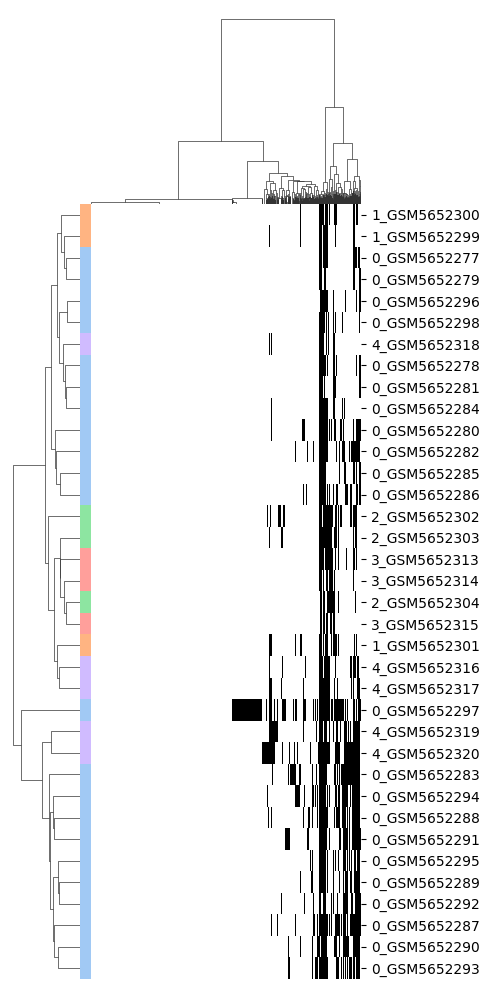

In [6]:
# 3261322	3261610
cm = sns.clustermap(1*df.loc[(df['chrom']=='chr2')].sample(10000, random_state=1).isna()\
               [list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'])].T,\
                row_colors=list(pd.DataFrame(rename).T['type'].map(type).astype(str).map({'0':sns.color_palette("pastel")[0],\
                                                               '1':sns.color_palette("pastel")[1],\
                                                               '2':sns.color_palette("pastel")[2],\
                                                               '3':sns.color_palette("pastel")[3],\
                                                               '4':sns.color_palette("pastel")[4]})),\
               cmap='gray_r', figsize=[5,10], method='ward', dendrogram_ratio=0.2, xticklabels=False)
cm.cax.set_visible(False)
# cm.fig.suptitle('pub') 

In [7]:
1*df.loc[(df['chrom']=='chr2')].sample(10000, random_state=1).isna().mean().mean()

0.08364210526315789

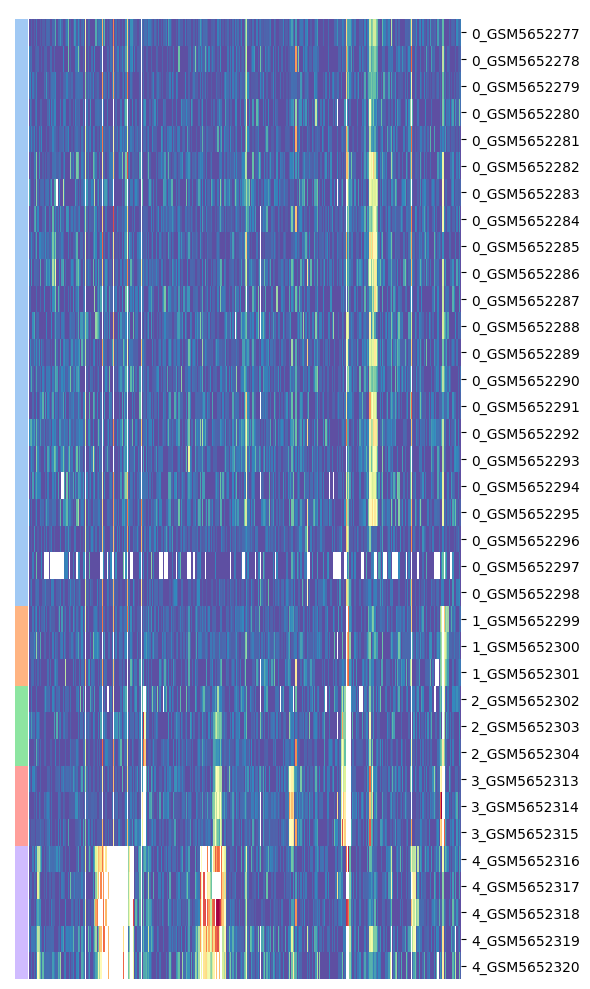

In [8]:
# 3261322	3261610
cm = sns.clustermap(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]\
               [list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'])].T,\
                row_colors=list(pd.DataFrame(rename).T['type'].map(type).astype(str).map({'0':sns.color_palette("pastel")[0],\
                                                               '1':sns.color_palette("pastel")[1],\
                                                               '2':sns.color_palette("pastel")[2],\
                                                               '3':sns.color_palette("pastel")[3],\
                                                               '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)
# cm.fig.suptitle('pub') 

In [9]:
df.to_csv('./Blood.metilene.chr2x.withNA.input',sep='\t',index=False, float_format='%.3f', na_rep='.')

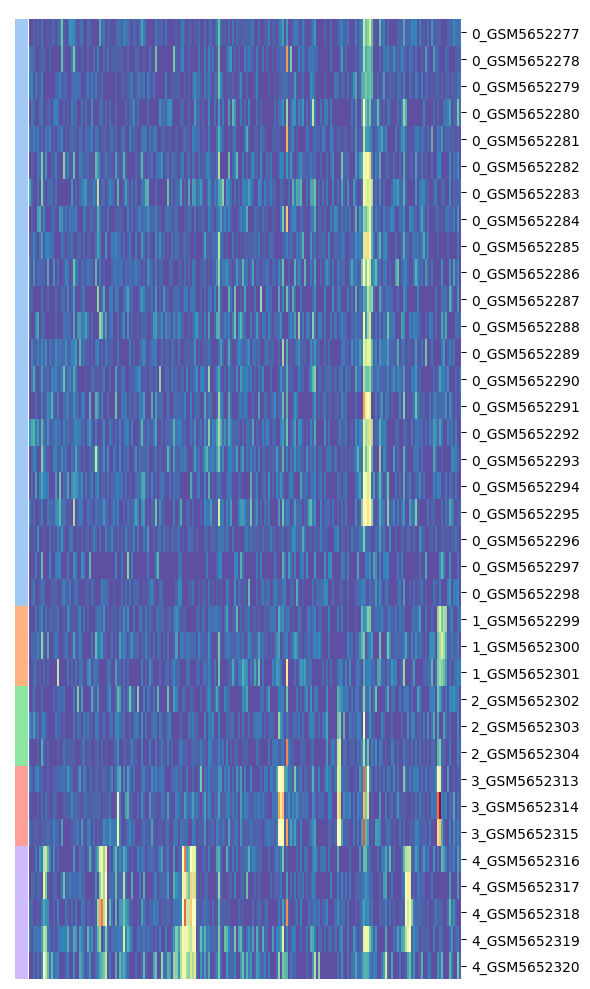

In [10]:
# 3261322	3261610
cm = sns.clustermap(1*df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)].dropna()\
               [list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'])].T,\
                                    row_colors=list(pd.DataFrame(rename).T['type'].map(type).astype(str).map({'0':sns.color_palette("pastel")[0],\
                                                               '1':sns.color_palette("pastel")[1],\
                                                               '2':sns.color_palette("pastel")[2],\
                                                               '3':sns.color_palette("pastel")[3],\
                                                               '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)
# cm.fig.suptitle('pub') 

In [11]:
df_nona = df.dropna().copy()
df_nona.to_csv('./Blood.metilene.chr2x.noNA.input',sep='\t',index=False, float_format='%.3f')

In [12]:
means = {}
df_fillna = df.copy()
for i in type.values():
    means[str(i)] = df_fillna[df_fillna.columns[df_fillna.columns.str.contains(str(i)+'_')]].T.mean()

for i in list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID']):
    df_fillna[i] = df_fillna[i].fillna(means[i.split('_')[0]])

df_fillna = df_fillna.fillna(0.5)
df_fillna.to_csv('./Blood.metilene.chr2x.fillNA.input',sep='\t',index=False, float_format='%.3f')

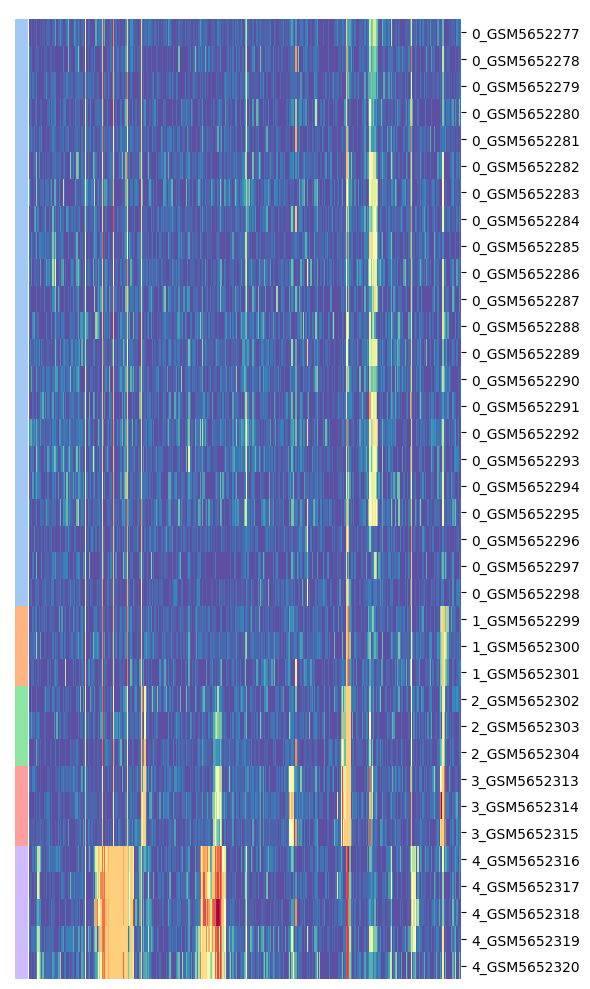

In [13]:
# 3261322	3261610
cm = sns.clustermap(df_fillna.loc[(df_fillna['chrom']=='chr2')&(df_fillna['pos']>= 3255001)&(df_fillna['pos']<=3273001)].dropna()\
               [list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'])].T,\
                                                        row_colors=list(pd.DataFrame(rename).T['type'].map(type).astype(str).map({'0':sns.color_palette("pastel")[0],\
                                                               '1':sns.color_palette("pastel")[1],\
                                                               '2':sns.color_palette("pastel")[2],\
                                                               '3':sns.color_palette("pastel")[3],\
                                                               '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)
# cm.fig.suptitle('pub') 

In [14]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

publication
Blood-Mono+Macro         NaN
Blood-NK            0.071429
dtype: float64
publication
Blood-B             0.049793
Blood-Granul        0.217573
Blood-Mono+Macro    0.081395
Blood-NK            0.149038
Blood-T             0.333333
dtype: float64
publication
Blood-B             0.173207
Blood-Granul        0.184371
Blood-Mono+Macro    0.064394
Blood-NK            0.139315
Blood-T             0.127168
dtype: float64
(344, 38)
0 10.0 0|1,3
1 34.0 0,1,2|4
2 57.0 0,1,2,3|4


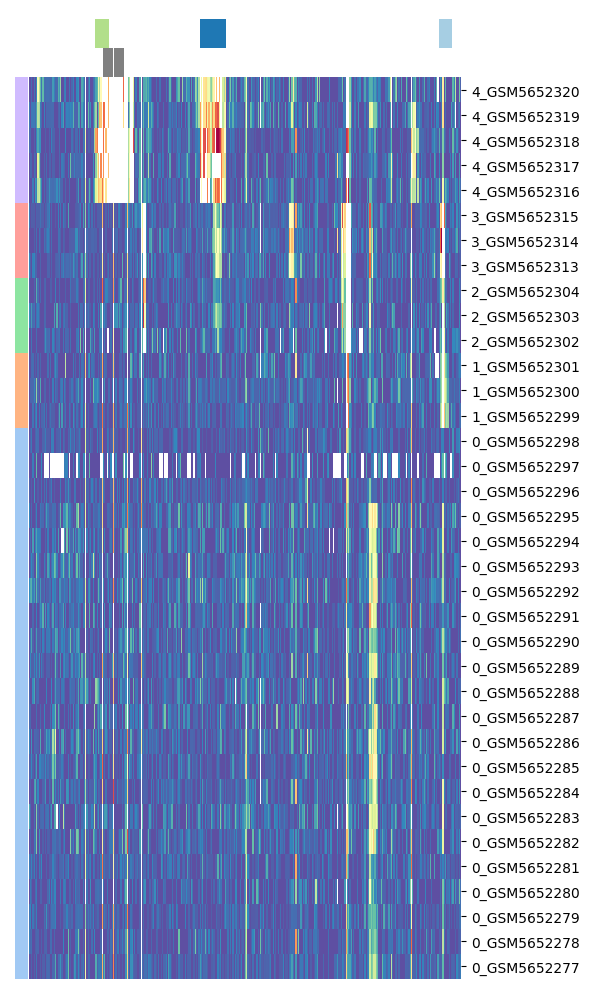

In [15]:
param_m = ''
param_NA = 'withNA'
tmp = df.copy()

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

for i in ['A','B','C']:
    unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4'+i)
    
    unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
    inUMs = {}
    for i in unmethyl_blood_chr2.index:
        for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
            inUMs[j] = unmethyl_blood_chr2['Type'][i]
    
    cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(tmp['pos']))))
    cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
    cmp['publication'] = cmp[0].map(inUMs)
    
    cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
    print(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

print(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)].shape)

DMR_ids = sorted(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).dropna().unique())

cDMRs = {}
for i in range(len(DMR_ids)):
    print(i, DMR_ids[i], id_convert[DMR_ids[i]])
    cDMRs[DMR_ids[i]] = sns.color_palette("Paired")[i]
    

cm = sns.clustermap(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\
               col_colors=[tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).map(cDMRs).fillna('white'),\
                           tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inUMs).map({'Blood-B':'gray'}).fillna('white')],\
                row_colors=list(pd.DataFrame(rename).T['type'].map(type).sort_values(ascending=0).astype(str).map({'0':sns.color_palette("pastel")[0],\
                       '1':sns.color_palette("pastel")[1],\
                       '2':sns.color_palette("pastel")[2],\
                       '3':sns.color_palette("pastel")[3],\
                       '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

publication
Blood-Mono+Macro         NaN
Blood-NK            0.178571
dtype: float64
publication
Blood-B             0.273859
Blood-Granul        0.288703
Blood-Mono+Macro    0.104651
Blood-NK            0.221154
Blood-T             0.717172
dtype: float64
publication
Blood-B             0.391069
Blood-Granul        0.284493
Blood-Mono+Macro    0.087121
Blood-NK            0.220779
Blood-T             0.228324
dtype: float64
(344, 38)
0 15.0 0,1,2|3
1 22.0 0,1|2,3
2 34.0 0,1,2|4
3 53.0 2,3|4
4 54.0 0,2,3|4
5 57.0 0,1,2,3|4
6 58.0 1,2,3|0,4
7 89.0 0|1,2,3,4


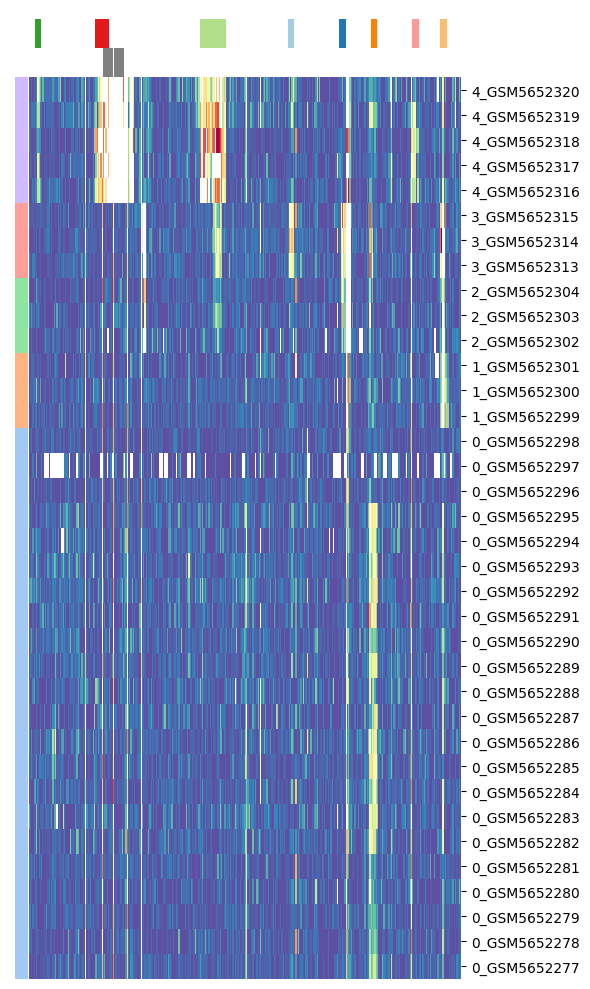

In [16]:
param_m = '.m5'
param_NA = 'withNA'
tmp = df.copy()

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

for i in ['A','B','C']:
    unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4'+i)
    
    unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
    inUMs = {}
    for i in unmethyl_blood_chr2.index:
        for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
            inUMs[j] = unmethyl_blood_chr2['Type'][i]
    
    cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(tmp['pos']))))
    cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
    cmp['publication'] = cmp[0].map(inUMs)
    
    cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
    print(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

print(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)].shape)

DMR_ids = sorted(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).dropna().unique())

cDMRs = {}
for i in range(len(DMR_ids)):
    print(i, DMR_ids[i], id_convert[DMR_ids[i]])
    cDMRs[DMR_ids[i]] = sns.color_palette("Paired")[i]
    

cm = sns.clustermap(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\
               col_colors=[tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).map(cDMRs).fillna('white'),\
                           tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inUMs).map({'Blood-B':'gray'}).fillna('white')],\
                row_colors=list(pd.DataFrame(rename).T['type'].map(type).sort_values(ascending=0).astype(str).map({'0':sns.color_palette("pastel")[0],\
                       '1':sns.color_palette("pastel")[1],\
                       '2':sns.color_palette("pastel")[2],\
                       '3':sns.color_palette("pastel")[3],\
                       '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

publication
Blood-Mono+Macro    0.5
Blood-NK            1.0
dtype: float64
publication
Blood-B             0.904564
Blood-Granul        0.832636
Blood-Mono+Macro    0.831395
Blood-NK            0.947115
Blood-T             0.707071
dtype: float64
publication
Blood-B             0.883627
Blood-Granul        0.713065
Blood-Mono+Macro    0.590909
Blood-NK            0.798111
Blood-T             0.586705
dtype: float64
(344, 38)
0 20.0 0|2,3
1 34.0 0,1,2|4
2 49.0 1,3|0,4
3 57.0 0,1,2,3|4


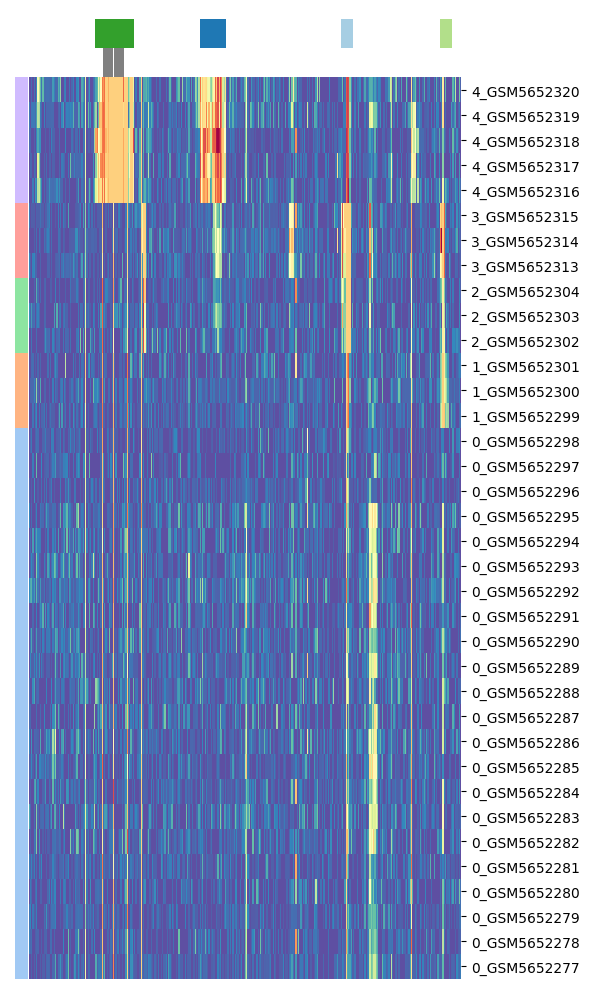

In [17]:
param_m = ''
param_NA = 'fillNA'
tmp = df_fillna.copy()

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

for i in ['A','B','C']:
    unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4'+i)
    
    unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
    inUMs = {}
    for i in unmethyl_blood_chr2.index:
        for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
            inUMs[j] = unmethyl_blood_chr2['Type'][i]
    
    cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(tmp['pos']))))
    cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
    cmp['publication'] = cmp[0].map(inUMs)
    
    cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
    print(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

print(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)].shape)

DMR_ids = sorted(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).dropna().unique())

cDMRs = {}
for i in range(len(DMR_ids)):
    print(i, DMR_ids[i], id_convert[DMR_ids[i]])
    cDMRs[DMR_ids[i]] = sns.color_palette("Paired")[i]
    

cm = sns.clustermap(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\
               col_colors=[tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).map(cDMRs).fillna('white'),\
                           tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inUMs).map({'Blood-B':'gray'}).fillna('white')],\
                row_colors=list(pd.DataFrame(rename).T['type'].map(type).sort_values(ascending=0).astype(str).map({'0':sns.color_palette("pastel")[0],\
                       '1':sns.color_palette("pastel")[1],\
                       '2':sns.color_palette("pastel")[2],\
                       '3':sns.color_palette("pastel")[3],\
                       '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

publication
Blood-Mono+Macro    1.0
Blood-NK            1.0
dtype: float64
publication
Blood-B             0.929461
Blood-Granul        0.916318
Blood-Mono+Macro    0.970930
Blood-NK            0.951923
Blood-T             0.949495
dtype: float64
publication
Blood-B             0.935047
Blood-Granul        0.859585
Blood-Mono+Macro    0.746212
Blood-NK            0.920897
Blood-T             0.679191
dtype: float64
(344, 38)
0 15.0 0,1,2|3
1 20.0 0|2,3
2 24.0 0|1,2,3
3 34.0 0,1,2|4
4 53.0 2,3|4
5 54.0 0,2,3|4
6 57.0 0,1,2,3|4
7 85.0 0|2,3,4
8 89.0 0|1,2,3,4


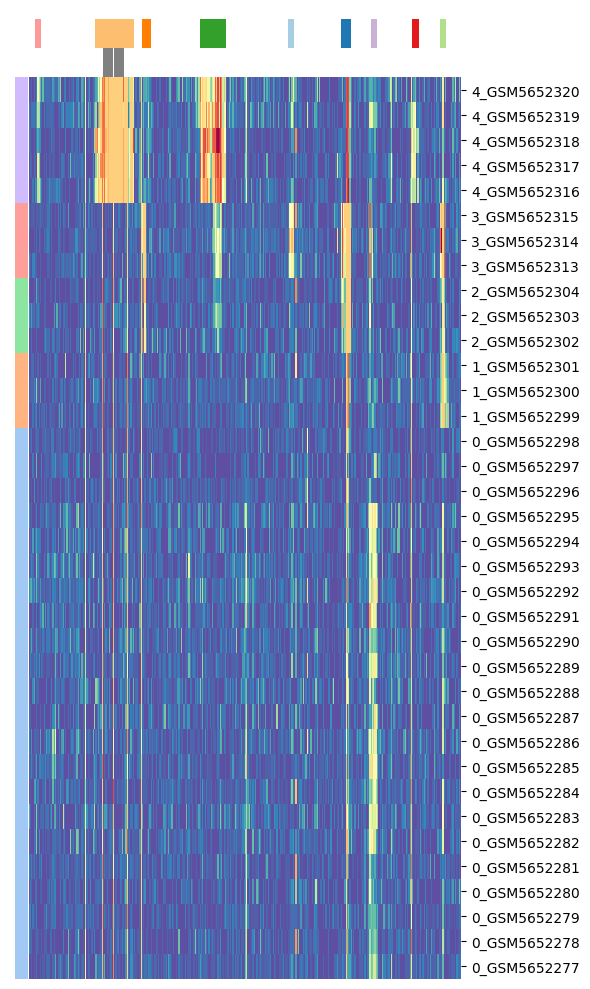

In [18]:
param_m = '.m5'
param_NA = 'fillNA'
tmp = df_fillna.copy()

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

for i in ['A','B','C']:
    unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4'+i)
    
    unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
    inUMs = {}
    for i in unmethyl_blood_chr2.index:
        for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
            inUMs[j] = unmethyl_blood_chr2['Type'][i]
    
    cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(tmp['pos']))))
    cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
    cmp['publication'] = cmp[0].map(inUMs)
    
    cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
    print(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

print(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)].shape)

DMR_ids = sorted(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).dropna().unique())

cDMRs = {}
for i in range(len(DMR_ids)):
    print(i, DMR_ids[i], id_convert[DMR_ids[i]])
    cDMRs[DMR_ids[i]] = sns.color_palette("Paired")[i]
    

cm = sns.clustermap(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\
               col_colors=[tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).map(cDMRs).fillna('white'),\
                           tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inUMs).map({'Blood-B':'gray'}).fillna('white')],\
                row_colors=list(pd.DataFrame(rename).T['type'].map(type).sort_values(ascending=0).astype(str).map({'0':sns.color_palette("pastel")[0],\
                       '1':sns.color_palette("pastel")[1],\
                       '2':sns.color_palette("pastel")[2],\
                       '3':sns.color_palette("pastel")[3],\
                       '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

publication
Blood-NK   NaN
dtype: float64
publication
Blood-B            NaN
Blood-Granul       NaN
Blood-Mono+Macro   NaN
Blood-NK           NaN
Blood-T            NaN
dtype: float64
publication
Blood-B             0.0125
Blood-Granul           NaN
Blood-Mono+Macro       NaN
Blood-NK               NaN
Blood-T                NaN
dtype: float64
(215, 38)
0 57.0 0,1,2,3|4


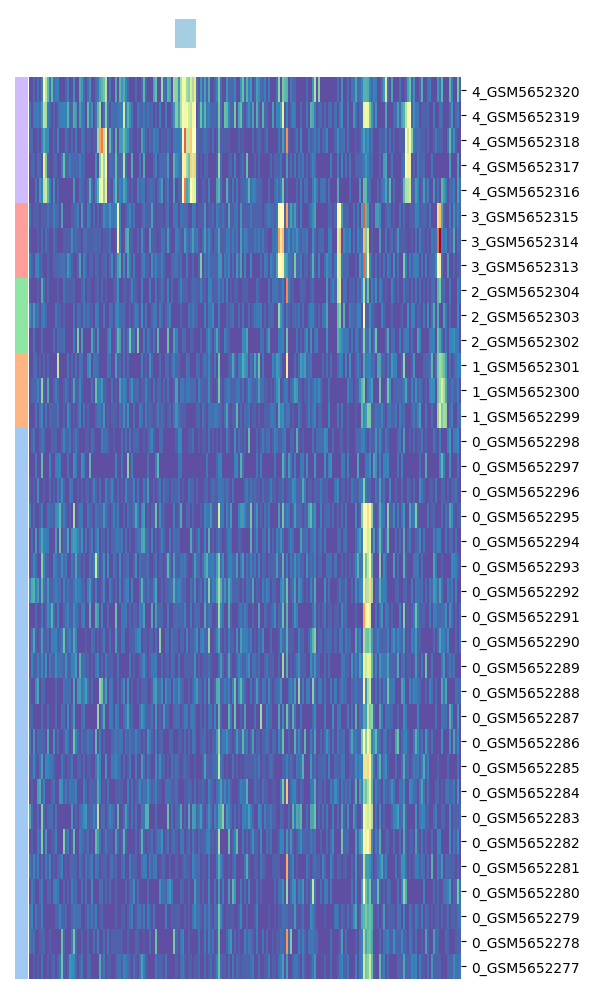

In [19]:
param_m = ''
param_NA = 'noNA'
tmp = df_nona.copy()

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

for i in ['A','B','C']:
    unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4'+i)
    
    unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
    inUMs = {}
    for i in unmethyl_blood_chr2.index:
        for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
            inUMs[j] = unmethyl_blood_chr2['Type'][i]
    
    cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(tmp['pos']))))
    cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
    cmp['publication'] = cmp[0].map(inUMs)
    
    cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
    print(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

print(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)].shape)

DMR_ids = sorted(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).dropna().unique())

cDMRs = {}
for i in range(len(DMR_ids)):
    print(i, DMR_ids[i], id_convert[DMR_ids[i]])
    cDMRs[DMR_ids[i]] = sns.color_palette("Paired")[i]
    

cm = sns.clustermap(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\
               col_colors=[tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).map(cDMRs).fillna('white'),\
                           tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inUMs).map({'Blood-B':'gray'}).fillna('white')],\
                row_colors=list(pd.DataFrame(rename).T['type'].map(type).sort_values(ascending=0).astype(str).map({'0':sns.color_palette("pastel")[0],\
                       '1':sns.color_palette("pastel")[1],\
                       '2':sns.color_palette("pastel")[2],\
                       '3':sns.color_palette("pastel")[3],\
                       '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

publication
Blood-NK   NaN
dtype: float64
publication
Blood-B             0.066667
Blood-Granul        0.052632
Blood-Mono+Macro    0.045455
Blood-NK                 NaN
Blood-T                  NaN
dtype: float64
publication
Blood-B             0.025000
Blood-Granul        0.104651
Blood-Mono+Macro    0.012987
Blood-NK            0.008772
Blood-T                  NaN
dtype: float64
(215, 38)
0 12.0 0,2|3
1 28.0 1|0,4
2 43.0 0|1,2,4
3 53.0 2,3|4
4 54.0 0,2,3|4
5 57.0 0,1,2,3|4


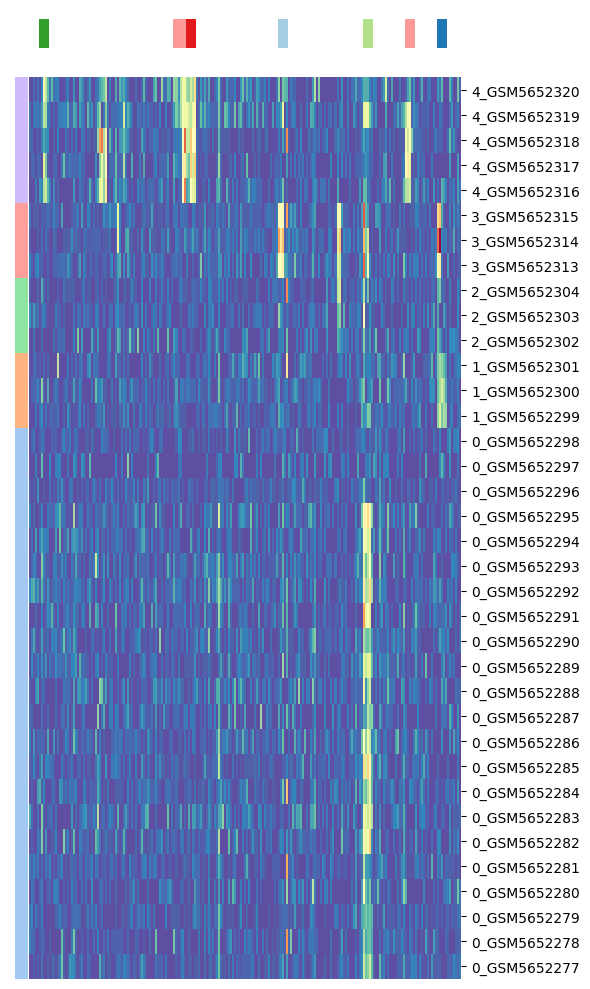

In [20]:
param_m = '.m5'
param_NA = 'noNA'
tmp = df_nona.copy()

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

for i in ['A','B','C']:
    unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4'+i)
    
    unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
    inUMs = {}
    for i in unmethyl_blood_chr2.index:
        for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
            inUMs[j] = unmethyl_blood_chr2['Type'][i]
    
    cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(tmp['pos']))))
    cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
    cmp['publication'] = cmp[0].map(inUMs)
    
    cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
    print(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

print(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)].shape)

DMR_ids = sorted(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).dropna().unique())

cDMRs = {}
for i in range(len(DMR_ids)):
    print(i, DMR_ids[i], id_convert[DMR_ids[i]])
    cDMRs[DMR_ids[i]] = sns.color_palette("Paired")[i]
    

cm = sns.clustermap(tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\
               col_colors=[tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inDMRs).map(cDMRs).fillna('white'),\
                           tmp.loc[(tmp['chrom']=='chr2')&(tmp['pos']>= 3255001)&(tmp['pos']<=3273001)]['pos'].map(inUMs).map({'Blood-B':'gray'}).fillna('white')],\
                row_colors=list(pd.DataFrame(rename).T['type'].map(type).sort_values(ascending=0).astype(str).map({'0':sns.color_palette("pastel")[0],\
                       '1':sns.color_palette("pastel")[1],\
                       '2':sns.color_palette("pastel")[2],\
                       '3':sns.color_palette("pastel")[3],\
                       '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

Missing values distribution in UMs (reported in the article) vs nonUM

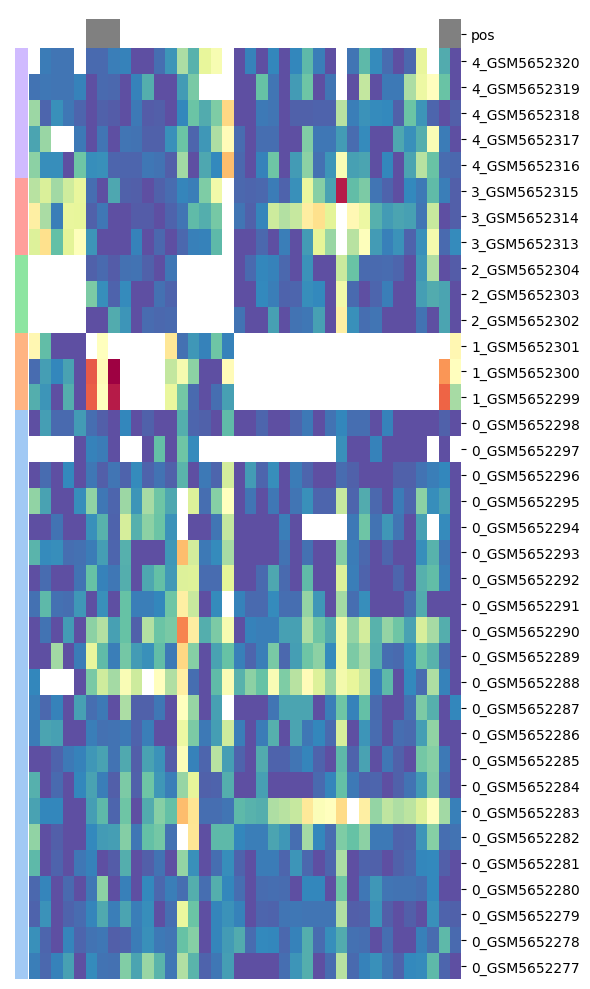

In [21]:
param_m = '.m5'
param_NA = 'withNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

for i in ['A']:
    unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4'+i)
    
    unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
    inUMs = {}
    for i in unmethyl_blood_chr2.index:
        for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
            inUMs[j] = unmethyl_blood_chr2['Type'][i]
    
    cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
    cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
    cmp['publication'] = cmp[0].map(inUMs)
    
    cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])


cm = sns.clustermap(df.loc[df['pos'].isin(cmp.dropna(subset=['publication'])[0])]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\

                    col_colors=df.loc[df['pos'].isin(cmp.dropna(subset=['publication'])[0])]['pos'].isin(cmp.dropna(subset=['metilene'])[0]).map({True:'gray'}),\
                    row_colors=list(pd.DataFrame(rename).T['type'].map(type).sort_values(ascending=0).astype(str).map({'0':sns.color_palette("pastel")[0],\
                       '1':sns.color_palette("pastel")[1],\
                       '2':sns.color_palette("pastel")[2],\
                       '3':sns.color_palette("pastel")[3],\
                       '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

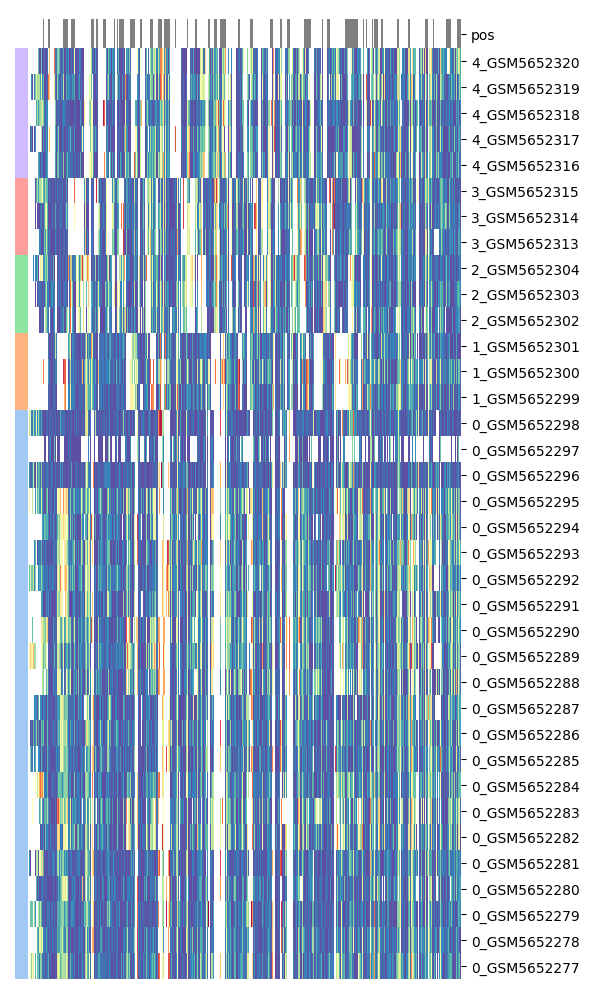

In [22]:
param_m = '.m5'
param_NA = 'withNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

for i in ['B']:
    unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4'+i)
    
    unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
    inUMs = {}
    for i in unmethyl_blood_chr2.index:
        for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
            inUMs[j] = unmethyl_blood_chr2['Type'][i]
    
    cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
    cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
    cmp['publication'] = cmp[0].map(inUMs)
    
    cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])


cm = sns.clustermap(df.loc[df['pos'].isin(cmp.dropna(subset=['publication'])[0])]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\

                    col_colors=df.loc[df['pos'].isin(cmp.dropna(subset=['publication'])[0])]['pos'].isin(cmp.dropna(subset=['metilene'])[0]).map({True:'gray'}),\
                    row_colors=list(pd.DataFrame(rename).T['type'].map(type).sort_values(ascending=0).astype(str).map({'0':sns.color_palette("pastel")[0],\
                       '1':sns.color_palette("pastel")[1],\
                       '2':sns.color_palette("pastel")[2],\
                       '3':sns.color_palette("pastel")[3],\
                       '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

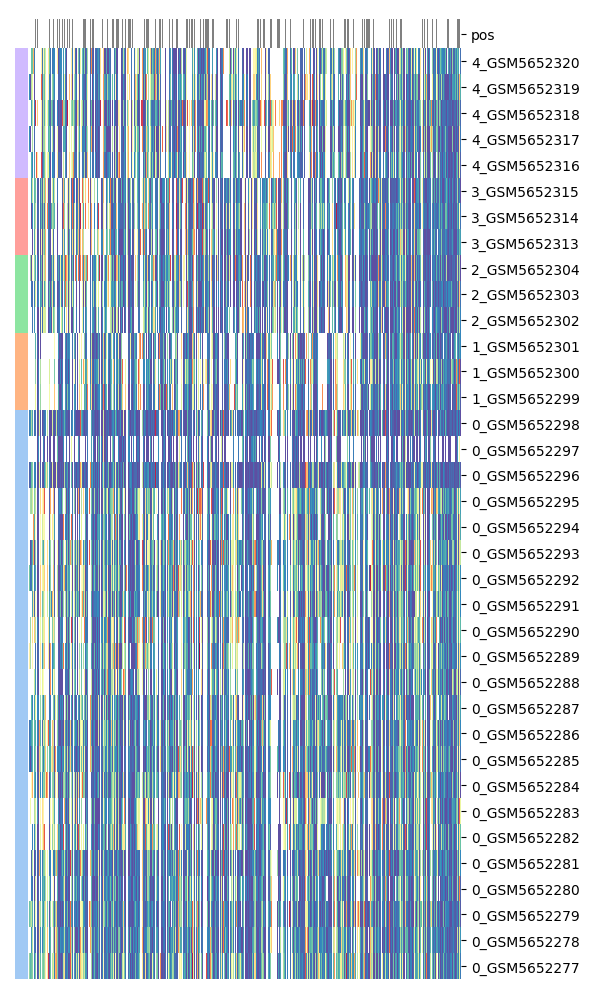

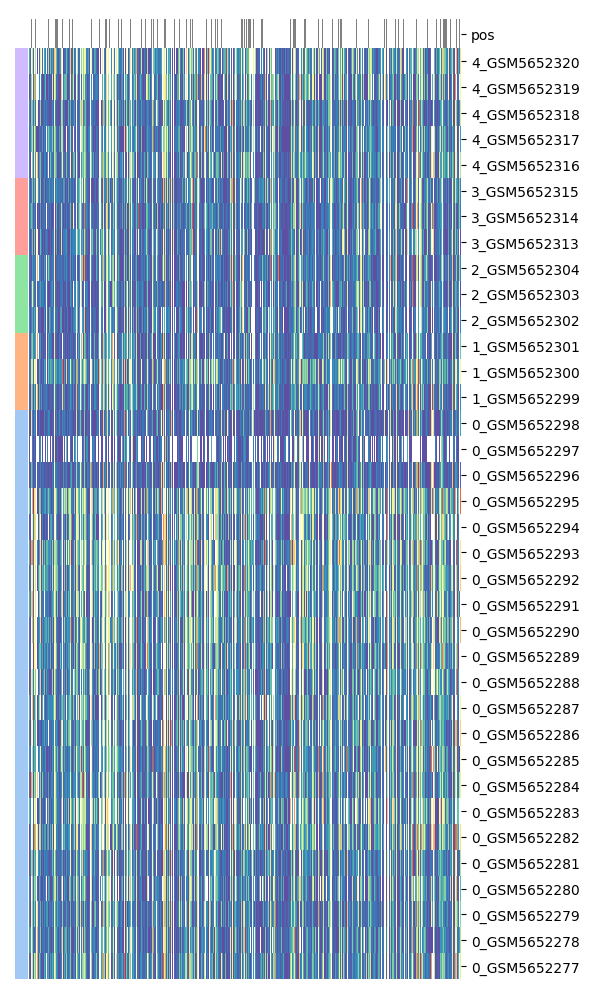

In [23]:
param_m = '.m5'
param_NA = 'withNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

for i in ['C']:
    unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4'+i)
    
    unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
    inUMs = {}
    for i in unmethyl_blood_chr2.index:
        for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
            inUMs[j] = unmethyl_blood_chr2['Type'][i]
    
    cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
    cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
    cmp['publication'] = cmp[0].map(inUMs)
    
    cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])


cm = sns.clustermap(df.loc[df['pos'].isin(cmp.dropna(subset=['publication'])[0])]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\

                    col_colors=df.loc[df['pos'].isin(cmp.dropna(subset=['publication'])[0])]['pos'].isin(cmp.dropna(subset=['metilene'])[0]).map({True:'gray'}),\
                    row_colors=list(pd.DataFrame(rename).T['type'].map(type).sort_values(ascending=0).astype(str).map({'0':sns.color_palette("pastel")[0],\
                       '1':sns.color_palette("pastel")[1],\
                       '2':sns.color_palette("pastel")[2],\
                       '3':sns.color_palette("pastel")[3],\
                       '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

df_random = df.loc[~df['pos'].isin(cmp.dropna(subset=['publication'])[0])].sample(df.loc[df['pos'].isin(cmp.dropna(subset=['publication'])[0])].shape[0], random_state=1)
cm2 = sns.clustermap(\
               df_random[sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\

                    col_colors=df_random['pos'].isin(cmp.dropna(subset=['metilene'])[0]).map({True:'gray'}),\
                    row_colors=list(pd.DataFrame(rename).T['type'].map(type).sort_values(ascending=0).astype(str).map({'0':sns.color_palette("pastel")[0],\
                       '1':sns.color_palette("pastel")[1],\
                       '2':sns.color_palette("pastel")[2],\
                       '3':sns.color_palette("pastel")[3],\
                       '4':sns.color_palette("pastel")[4]})),\
               cmap='Spectral', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm2.cax.set_visible(False)

In [24]:
# Percentage of CpGs with NA in DMRs
(df.loc[df['pos'].isin(cmp.dropna(subset=['publication'])[0])]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T.isna().mean()!=0).mean()

0.8571860816944025

In [25]:
# Percentage of CpGs with NA in non-DMRs
(df_random[sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T.isna().mean()!=0).mean()

0.5252647503782149